# Gaussian Mixture Model (GMM)

This assignment covers Gaussian Mixture Model, to select optimal modes for recolorization of an outdoor landscape image.

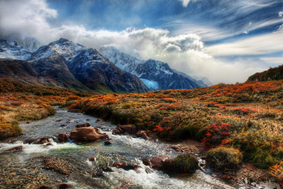



# Setup



In [ ]:
import cv2
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

root_ds = '.'

## Mounting Google Drive (Google Colab only)
First, we'll mount the distant Google Drive locally. We assume here you have created a shortcut `2020-MSAIMove_computervision_shared` pointing to the class shared folder.

Rather than downloading, distant mounting ensure fast access without need of download.

In [ ]:
if 'google.colab' in str(get_ipython()):
  import os
  from google.colab import drive
  drive.mount('/content/drive')

  root_ds = '/content/drive/MyDrive/2020-MSAIMove_computervision_shared/datasets/'
  assert(os.path.exists(root_ds))

Mounted at /content/drive


# Exercise

Let's first load the landscape image.
The rest is yours, follow code guidance below.

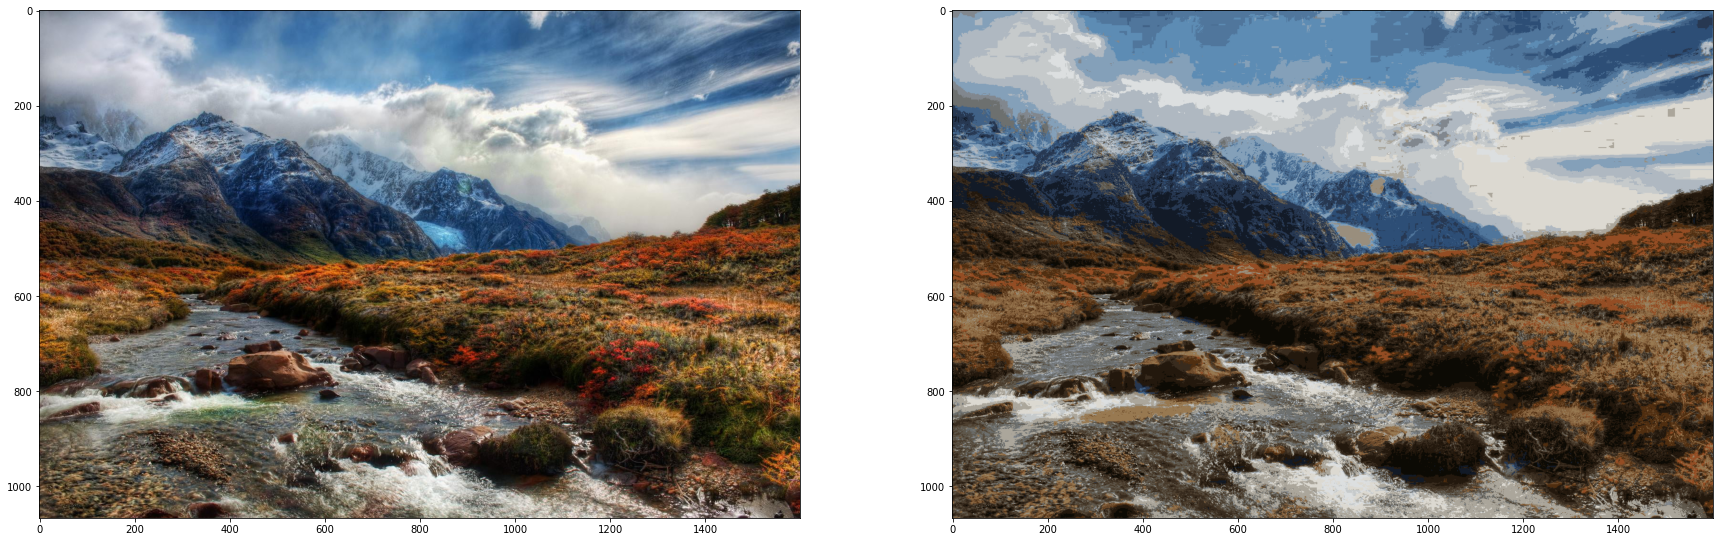

In [ ]:
imBGR = cv2.imread(os.path.join(root_ds, "../datasets/misc/landscape_hdr.jpg"))

N = 25

# Segment that image in N different cluster using a Gaussian mixture model (e.g. N=17)
# 1. Create the gaussian mixture:
g = mixture.GaussianMixture(n_components=N, max_iter=100)

# 2. Fit the image observed to the GMM:
obs = imBGR.reshape(imBGR.shape[0]*imBGR.shape[1],3)
g.fit(obs)

# means and cov of the gmm are stored in:
# g.means_
# g.covariances_

proba_array = g.predict_proba(obs)

# Use the Probability Distribution Function (PDF) to compute which pixel belong to which Gaussian
#  and assign the mean of the gaussian to the pixels

#cluster_arg = []
#for i in range(len(proba_array)):
#  cluster_arg.append(proba_array[i].argmax())
#cluster_arg = np.array(cluster_arg)

cluster_arg = np.argmax(proba_array,axis = 1)

clusterised_pic = cluster_arg.reshape(len(imBGR),len(imBGR[0]))

clusterised_pic2 = np.zeros((imBGR.shape[0], imBGR.shape[1], imBGR.shape[2]),dtype = int)
for i in range(imBGR.shape[0]):
  for j in range(imBGR.shape[1]):
    clusterised_pic2[i][j] = g.means_[clusterised_pic[i][j]]

# Didn't succed to make that work for now
#clusterised_pic2 = g.means_[clusterised_pic]


plt.figure('GMM Process',figsize=(30,30))
plt.subplot(1, 2, 1)
plt.imshow(imBGR[..., ::-1])
plt.subplot(1, 2, 2)
plt.imshow(clusterised_pic2[..., ::-1])

plt.show()